___

<a href='http://www.pieriandata.com'><img src='Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>

# Facebook Prophet Evaluations of Vehicle Miles Traveled Forecasting on Time Series Data

**By Drew Sims**

The following project was an exercise project given by Pierian Data in the Python for Time-series Data Science Bootcamp.

**The goal of this project is to forecast the amount of miles that will be traveled within the United States using Facebook's Prophet Library. The model will then be evaluated using Facebook Prophet's Metrics.**

        - The data is based on the number of miles driven within the United States each year
        - The data is collected in a monthly interval

Data download link: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

**The Steps are as followed:**

**1.)** Import Libraries

**2.)** Import CSV Data

**3.)** Explore Data

**4.)** Visualize Data

**5.)** Train Test Split

**6.)** Create Prophet Model

**7.)** Visualize Model Performance

**8.)** Manually Evaluate Model Performance

**9.)** Prophet Diagnostics for Model Evaluation

# 1.) Import Libraries

In [1]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

# 2.) Import CSV Data

In [2]:
# Read in the csv and convert to a dataframe

df = pd.read_csv('..\\Data\\Miles_Traveled.csv')

# 3.) Explore Data

In [3]:
# Check datatypes and names of columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [4]:
# Need to rename the prediction data column from its federal code to 'y'
# Need to set the date column to 'ds' for Prophet to recognize it

# Also need to change the data type from floats to datetime64

df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

In [5]:
# Ensure column names are correct for Prophet to recognize

df.head(5)

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [6]:
df.tail(5)

,ds,y
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0
587,2018-12-01,268413.0


# 4.) Visualize Data

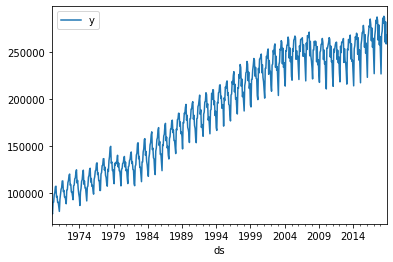

In [7]:
df.plot(x='ds',y='y')

# 5.) Train Test Split

In [8]:
len(df)

588

In [9]:
# Separate test set as the last 12 months (1 year)

train = df.iloc[:576]
test = df.iloc[576:]

# 6.) Create Prophet Model

In [10]:
# Create Instance of Prophet
# Fit the Prophet Model
# Creates dates dataframe with dates for the training data length extended by however many periods you have
# Forecast future data (fill empty dates dataframe from 'future' with corresponding predicted values)

m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
future

,ds
0,1970-01-01
1,1970-02-01
2,1970-03-01
3,1970-04-01
4,1970-05-01
...,...
583,2018-08-01
584,2018-09-01
585,2018-10-01
586,2018-11-01


In [12]:
len(future)

588

In [13]:
# Ensure 'yhat' (predicted values) are there

forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263557.251253,274044.657658,285510.153235,263495.763829,263614.781120,16443.515456,16443.515456,16443.515456,16443.515456,16443.515456,16443.515456,0.0,0.0,0.0,280000.766709
584,2018-09-01,263701.749361,256361.233488,267728.137133,263603.284699,263783.409984,-1675.833952,-1675.833952,-1675.833952,-1675.833952,-1675.833952,-1675.833952,0.0,0.0,0.0,262025.915409
585,2018-10-01,263841.586239,263460.076168,275251.575346,263714.093540,263942.528577,5293.167898,5293.167898,5293.167898,5293.167898,5293.167898,5293.167898,0.0,0.0,0.0,269134.754137
586,2018-11-01,263986.084347,249309.151252,261586.257596,263828.721670,264119.230890,-8218.559465,-8218.559465,-8218.559465,-8218.559465,-8218.559465,-8218.559465,0.0,0.0,0.0,255767.524882
587,2018-12-01,264125.921226,250995.461051,262587.002296,263937.229592,264284.180649,-6932.605385,-6932.605385,-6932.605385,-6932.605385,-6932.605385,-6932.605385,0.0,0.0,0.0,257193.315841


# 7.) Visualize Model Performance

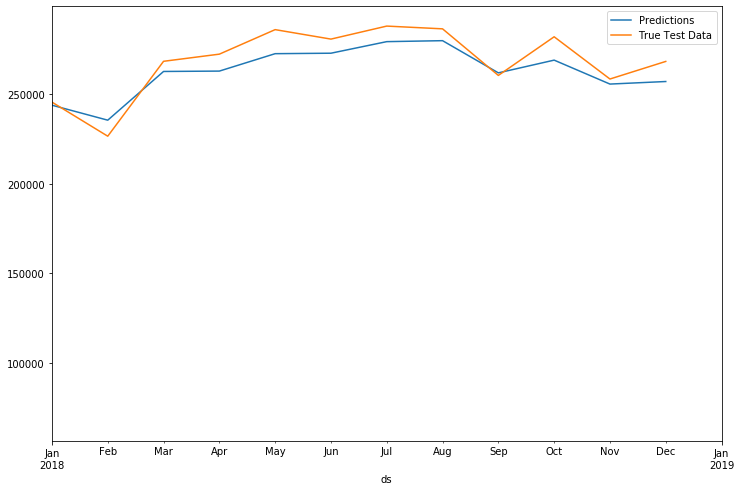

In [14]:
# 2018-2019 is the dates of the start and end of test set
# predictions seem rather close to the true data

ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',label='True Test Data',legend=True,ax=ax,xlim=('2018-01-01','2019-01-01'))

# 8.) Manually Evaluate Model Performance

In [15]:
# Import RMSE Model

from statsmodels.tools.eval_measures import rmse

In [16]:
# Create predictions variable for last 12 months of data

predictions = forecast.iloc[-12:]['yhat']

In [17]:
# prediction values

predictions

576    243969.272997
577    235604.734139
578    262807.783513
579    263016.187323
580    272739.162173
581    272999.948918
582    279459.160887
583    280000.766709
584    262025.915409
585    269134.754137
586    255767.524882
587    257193.315841
Name: yhat, dtype: float64

In [18]:
# test values

test['y']

576    245695.0
577    226660.0
578    268480.0
579    272475.0
580    286164.0
581    280877.0
582    288145.0
583    286608.0
584    260595.0
585    282174.0
586    258590.0
587    268413.0
Name: y, dtype: float64

In [19]:
# Determine RMSE for predictions vs 'y' values

rmse(predictions,test['y'])

8524.084735454997

In [20]:
# The RMSE error is under 10,000 while the data is in the 200,000's making the error very minimal

test.mean()

C:\Users\Drew\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


y    268739.666667
dtype: float64

# 9.) Prophet Diagnoistics for Model Evaluation

In [21]:
# import Prophet diagonistics libraries

from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [22]:
# Define Intial training period (prophet needs it in days, needs a very particular format based off pandas 'TimeDelta')
    # Period length for cross validation
        # Horizon of prediction for each fold

# Initial
initial = 5 * 365 
initial = str(initial) + ' days'   # Prophet requires it in strings

In [23]:
initial

'1825 days'

In [24]:
# Period (number of folds)

period = 5 * 365
period = str(period) + ' days'

In [25]:
# Horizon

horizon = 365
horizon = str(horizon) + ' days'

In [26]:
# Cross validaiton

df_cv = cross_validation(m,initial=initial,period=period,horizon=horizon)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00


In [27]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.087397,107019.198485,109961.071503,102445.0,1976-12-11
1,1977-02-01,102996.111518,101501.295503,104352.363671,102416.0,1976-12-11
2,1977-03-01,118973.318133,117489.205987,120416.004280,119960.0,1976-12-11
3,1977-04-01,120612.923726,119170.990652,122166.209608,121513.0,1976-12-11
4,1977-05-01,127883.031847,126413.108118,129368.538520,128884.0,1976-12-11


In [28]:
# Split into 5 periods

len(df_cv)

108

In [29]:
# Performance_metrics allows you to see the raw data of mse,rmse,mae(moving average),mape(mean absolute percentage error)

performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,52 days,2.440480e+07,4940.121674,4543.226142,0.027839,0.023430,0.4
1,53 days,2.189073e+07,4678.753115,4275.518107,0.025071,0.023430,0.4
2,54 days,1.845424e+07,4295.839617,3751.881988,0.020184,0.022341,0.5
3,55 days,2.353986e+07,4851.789757,4286.500962,0.023332,0.023430,0.4
4,57 days,2.121071e+07,4605.508636,4011.466093,0.021541,0.022341,0.5
...,...,...,...,...,...,...,...
94,360 days,1.844636e+07,4294.922982,3768.283191,0.019668,0.019608,0.5
95,361 days,1.755041e+07,4189.321092,3487.275332,0.018267,0.019006,0.5
96,362 days,3.171401e+07,5631.519540,4404.117322,0.022028,0.024617,0.4
97,364 days,3.002471e+07,5479.480904,4245.018294,0.021435,0.021653,0.5


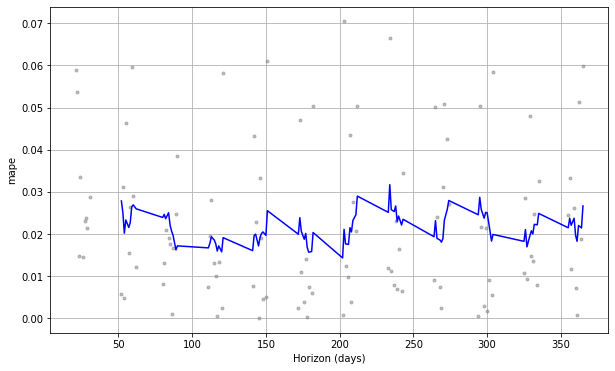

In [30]:
# Plot this information
# This dataset had alot of seasonality and strong trends to make it easier to predict far into the future

plot_cross_validation_metric(df_cv,metric='mape');